<a href="https://colab.research.google.com/github/utsabsarkar12/Machine_Learning/blob/main/Social_Media_vs_Productivity_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Choosing real world dataset

In [2]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Step 2: Load the dataset
df = pd.read_csv("/content/social_media_vs_productivity.csv")

# Step 3: Display dataset info
print("Dataset Shape:", df.shape)
print("\nFirst 5 Rows:\n", df.head())

Dataset Shape: (30000, 19)

First 5 Rows:
    age  gender    job_type  daily_social_media_time  \
0   56    Male  Unemployed                 4.180940   
1   46    Male      Health                 3.249603   
2   32    Male     Finance                      NaN   
3   60  Female  Unemployed                      NaN   
4   25    Male          IT                      NaN   

  social_platform_preference  number_of_notifications  work_hours_per_day  \
0                   Facebook                       61            6.753558   
1                    Twitter                       59            9.169296   
2                    Twitter                       57            7.910952   
3                   Facebook                       59            6.355027   
4                   Telegram                       66            6.214096   

   perceived_productivity_score  actual_productivity_score  stress_level  \
0                      8.040464                   7.291555           4.0   
1          

##2. Perform data preprocessing

In [7]:
# Step 4: Identify Missing Values
missing_counts = df.isnull().sum()
print("\nMissing Values per Column:\n", missing_counts)


Missing Values per Column:
 age                                  0
gender                               0
job_type                             0
daily_social_media_time           2765
social_platform_preference           0
number_of_notifications              0
work_hours_per_day                   0
perceived_productivity_score      1614
actual_productivity_score         2365
stress_level                      1904
sleep_hours                       2598
screen_time_before_sleep          2211
breaks_during_work                   0
uses_focus_apps                      0
has_digital_wellbeing_enabled        0
coffee_consumption_per_day           0
days_feeling_burnout_per_month       0
weekly_offline_hours                 0
job_satisfaction_score            2730
dtype: int64


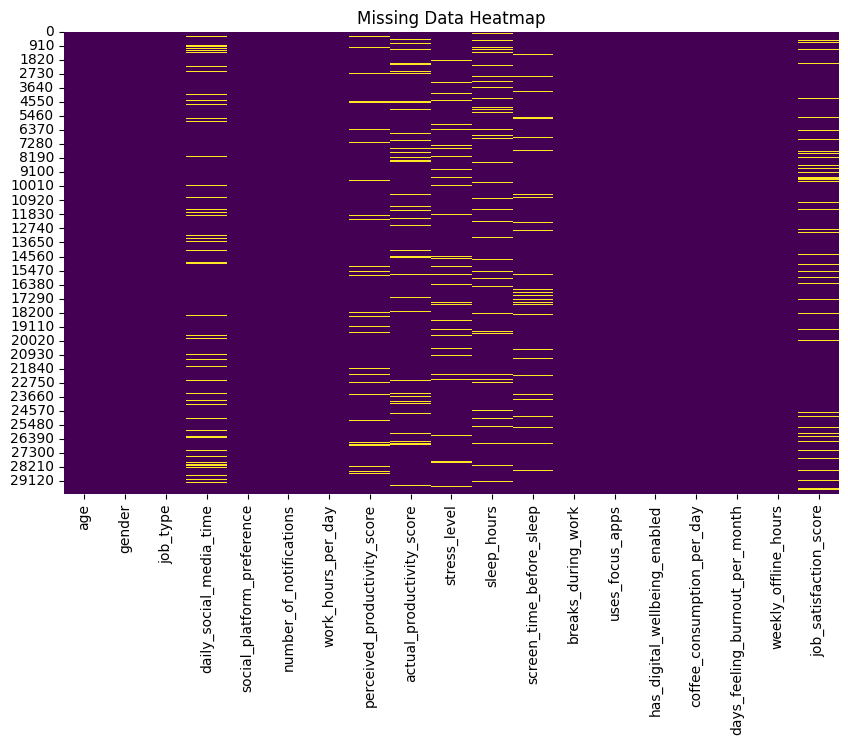

In [8]:
# Step 5: Visualize Missing Values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()

b. Describe Missing Data Pattern

MCAR: Missing completely at random (no relation to other variables).

MAR: Missing at random (related to observed variables).

In [9]:
# Step 6: Briefly describe missing data pattern
# Here, you can check MCAR, MAR, or MNAR.
# In this assignment, we will just note that missingness varies across columns.
print("\nMissing Data Pattern:")
print("Some columns have large amounts of missing data (e.g., daily_social_media_time, sleep_hours).")
print("The missingness may depend on other variables (possible MAR), but not fully random.")



Missing Data Pattern:
Some columns have large amounts of missing data (e.g., daily_social_media_time, sleep_hours).
The missingness may depend on other variables (possible MAR), but not fully random.


##3. Apply Imputation Methods

In [10]:
# Step 7: Apply Different Imputation Methods
# Forward Fill
df_ffill = df.fillna(method='ffill')

# Backward Fill
df_bfill = df.fillna(method='bfill')

# Mean Imputation (numeric only)
df_mean = df.fillna(df.mean(numeric_only=True))

# Median Imputation (numeric only)
df_median = df.fillna(df.median(numeric_only=True))

/tmp/ipython-input-3172978033.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill = df.fillna(method='ffill')
/tmp/ipython-input-3172978033.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bfill = df.fillna(method='bfill')


## 4. Compare modeling performance

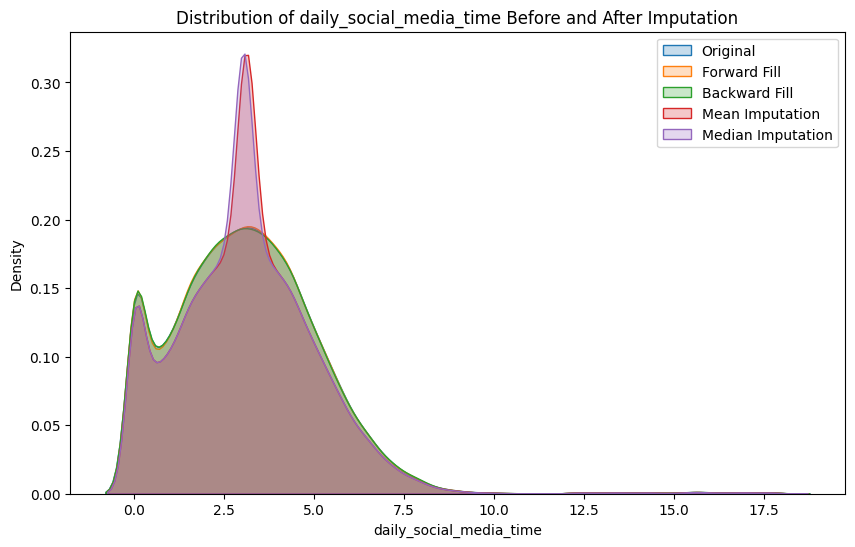

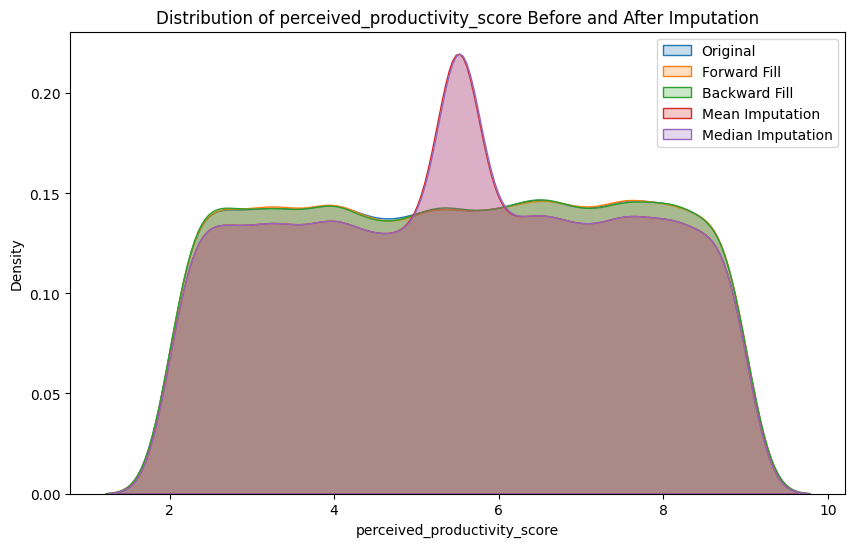

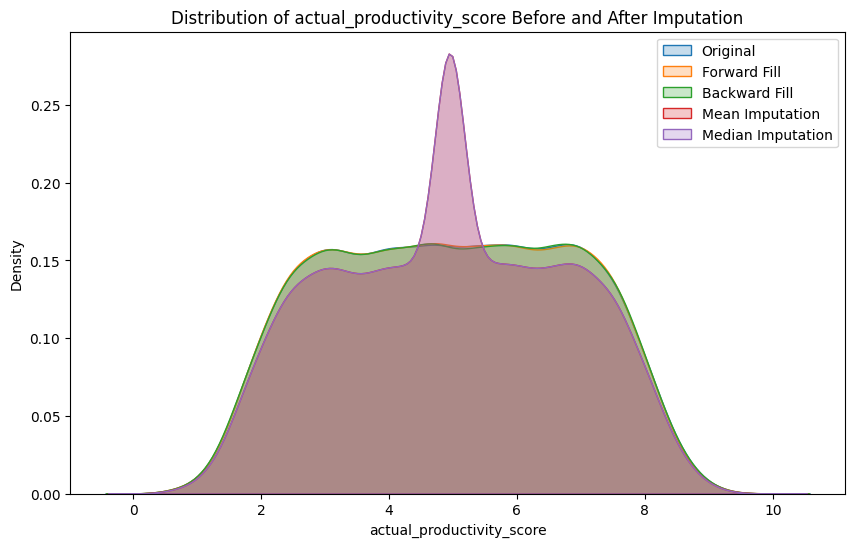

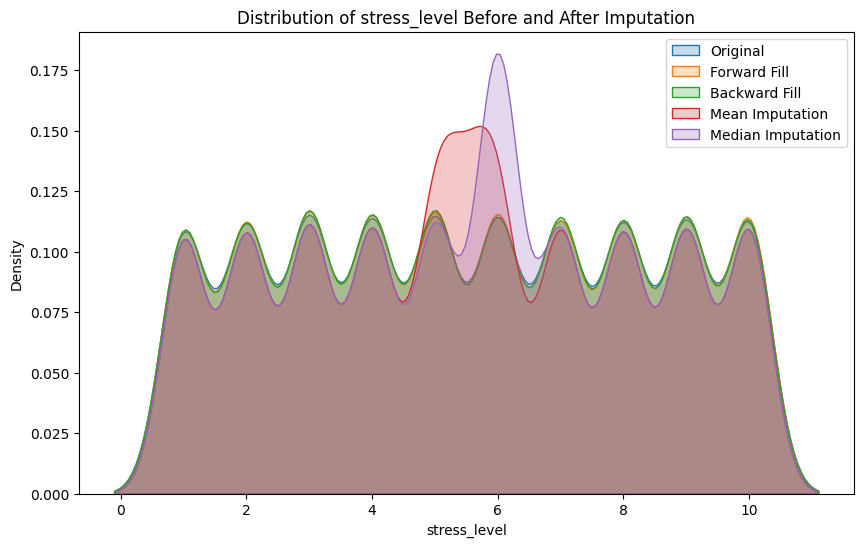

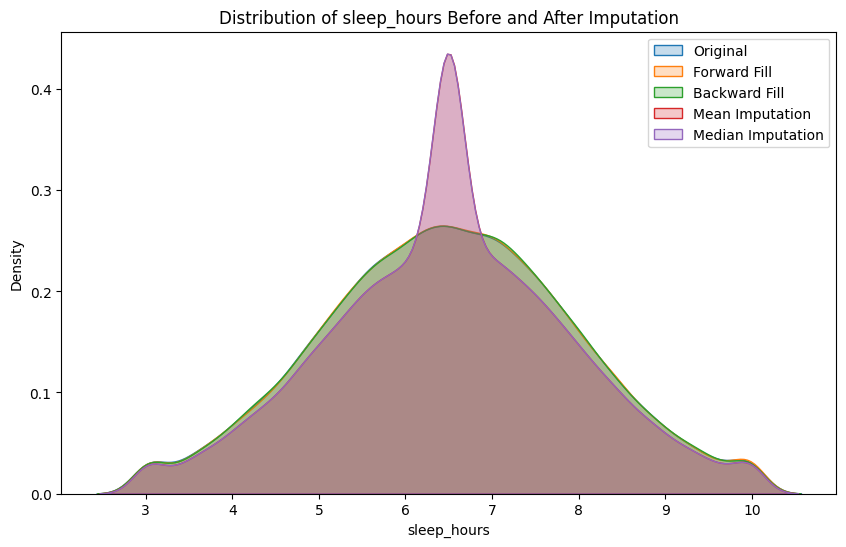

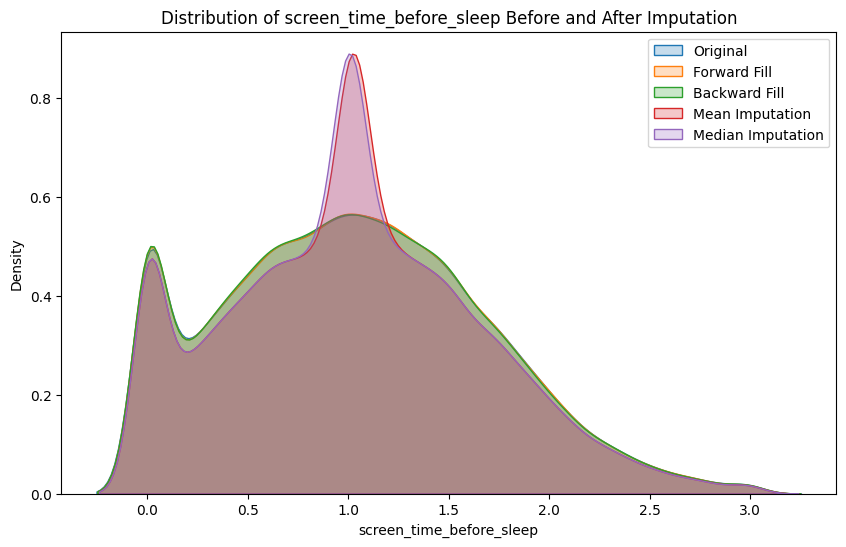

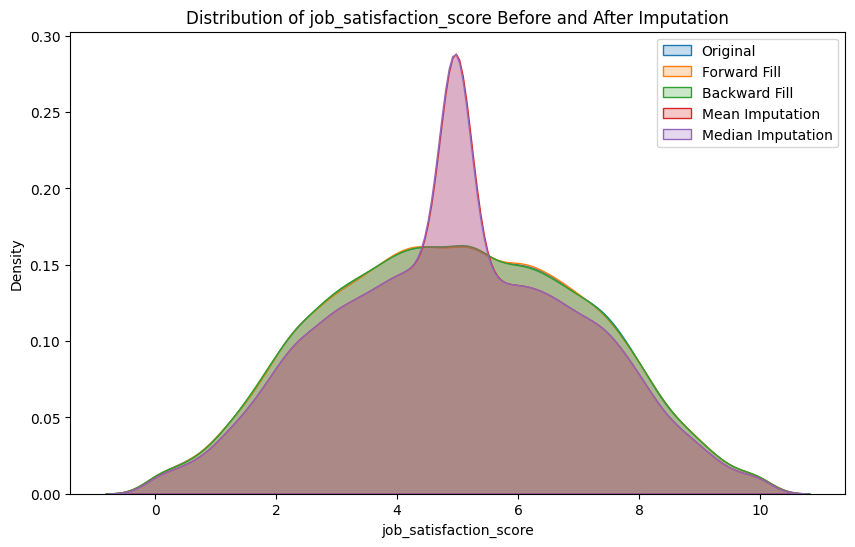

In [14]:
# Step 8: Visualize the distribution of data before and after imputation
cols_to_visualize = ['daily_social_media_time', 'perceived_productivity_score', 'actual_productivity_score', 'stress_level', 'sleep_hours', 'screen_time_before_sleep', 'job_satisfaction_score']

for col in cols_to_visualize:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(df[col], label='Original', fill=True)
    sns.kdeplot(df_ffill[col], label='Forward Fill', fill=True)
    sns.kdeplot(df_bfill[col], label='Backward Fill', fill=True)
    sns.kdeplot(df_mean[col], label='Mean Imputation', fill=True)
    sns.kdeplot(df_median[col], label='Median Imputation', fill=True)
    plt.title(f'Distribution of {col} Before and After Imputation')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

In [15]:
# Compare Key Statistics Before & After Imputation
def compare_stats(original, imputed, method_name):
    print(f"\n--- {method_name} Imputation ---")
    print("Mean:\n", imputed.mean(numeric_only=True))
    print("Median:\n", imputed.median(numeric_only=True))
    print("Std:\n", imputed.std(numeric_only=True))

In [16]:
compare_stats(df, df_ffill, "Forward Fill")
compare_stats(df, df_bfill, "Backward Fill")
compare_stats(df, df_mean, "Mean Imputation")
compare_stats(df, df_median, "Median Imputation")


--- Forward Fill Imputation ---
Mean:
 age                               41.486867
daily_social_media_time            3.109929
number_of_notifications           59.958767
work_hours_per_day                 6.990792
perceived_productivity_score       5.509859
actual_productivity_score          4.948212
stress_level                       5.515100
sleep_hours                        6.503881
screen_time_before_sleep           1.025641
breaks_during_work                 4.992200
uses_focus_apps                    0.300700
has_digital_wellbeing_enabled      0.246600
coffee_consumption_per_day         1.999300
days_feeling_burnout_per_month    15.557067
weekly_offline_hours              10.360655
job_satisfaction_score             4.967295
dtype: float64
Median:
 age                               41.000000
daily_social_media_time            3.026699
number_of_notifications           60.000000
work_hours_per_day                 6.990641
perceived_productivity_score       5.525186
actual_produ

In [17]:
# Apply ML Model to Compare Effects
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd

def run_model(data, label_col):
    # Impute the label column before separating
    data[label_col] = data[label_col].fillna(data[label_col].mean())

    # Select only numeric columns for the model, excluding the label column
    numeric_data = data.select_dtypes(include=['number']).drop(columns=[label_col], errors='ignore')

    # Identify categorical columns to encode
    categorical_cols = data.select_dtypes(include=['object']).columns

    # Apply one-hot encoding to categorical columns
    encoded_data = pd.get_dummies(data[categorical_cols])

    # Combine numeric and encoded categorical data
    X = pd.concat([numeric_data, encoded_data], axis=1)

    y = data[label_col]

    # Check for NaNs before splitting the data
    if X.isnull().sum().sum() > 0:
        print(f"NaN values found in feature data before splitting for {label_col}:")
        print(X.isnull().sum()[X.isnull().sum() > 0])
        # Drop rows with NaNs as a temporary measure
        X = X.dropna()
        y = y[X.index]


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return mean_squared_error(y_test, y_pred)

print("MSE with Forward Fill:", run_model(df_ffill.copy(), "actual_productivity_score"))
print("MSE with Backward Fill:", run_model(df_bfill.copy(), "actual_productivity_score"))
print("MSE with Mean Imputation:", run_model(df_mean.copy(), "actual_productivity_score"))
print("MSE with Median Imputation:", run_model(df_median.copy(), "actual_productivity_score"))

MSE with Forward Fill: 0.9134465694092074
NaN values found in feature data before splitting for actual_productivity_score:
daily_social_media_time    1
dtype: int64
MSE with Backward Fill: 0.9370532093513023
MSE with Mean Imputation: 0.5401058062995585
MSE with Median Imputation: 0.5401670878488317


In [18]:
# Step 9: Save Outputs
df_ffill.to_csv("imputed_forward_fill.csv", index=False)
df_bfill.to_csv("imputed_backward_fill.csv", index=False)
df_mean.to_csv("imputed_mean.csv", index=False)
df_median.to_csv("imputed_median.csv", index=False)

print("\nImputation Completed. Files Saved:")
print("imputed_forward_fill.csv, imputed_backward_fill.csv, imputed_mean.csv, imputed_median.csv")



Imputation Completed. Files Saved:
imputed_forward_fill.csv, imputed_backward_fill.csv, imputed_mean.csv, imputed_median.csv


5. Conclusion:
Mean and median imputation are simple and preserve central tendencies, but may distort variance. Forward/backward fills work well for time-series or ordered data, but here they may introduce bias. The choice of imputation depends on the type of data and analysis goal.